In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
import os
print(os.getcwd())
os.chdir(r'Y:\22pole_iontrap-exchange\Students\Aravindh\kinetics')
print(os.getcwd())

D:\FELion-Spectrum-Analyser\testing
Y:\22pole_iontrap-exchange\Students\Aravindh\kinetics


In [3]:
from glob import glob as find

In [4]:
find('*.scan')

['07_03_19-5.scan']

In [5]:
from timescan_plot import timescanplot

In [6]:
scanfile = '07_03_19-5.scan'
location = r'Y:\22pole_iontrap-exchange\Students\Aravindh\kinetics'

time, m, masslist, iterations, t_res, t_b0 = timescanplot(scanfile, location)


ALL: found at line no. 62

#mass18.80:	4

#mass24.80:	4

#mass25.80:	4

#mass27.80:	4

#mass28.80:	4

###############
File: 07_03_19-5.scan
Location: Y:\22pole_iontrap-exchange\Students\Aravindh\kinetics
###############
{'res': 'm03_ao13_reso', 'b0': 'm03_ao09_width'}
{'res': 1.0, 'b0': 10000.0}


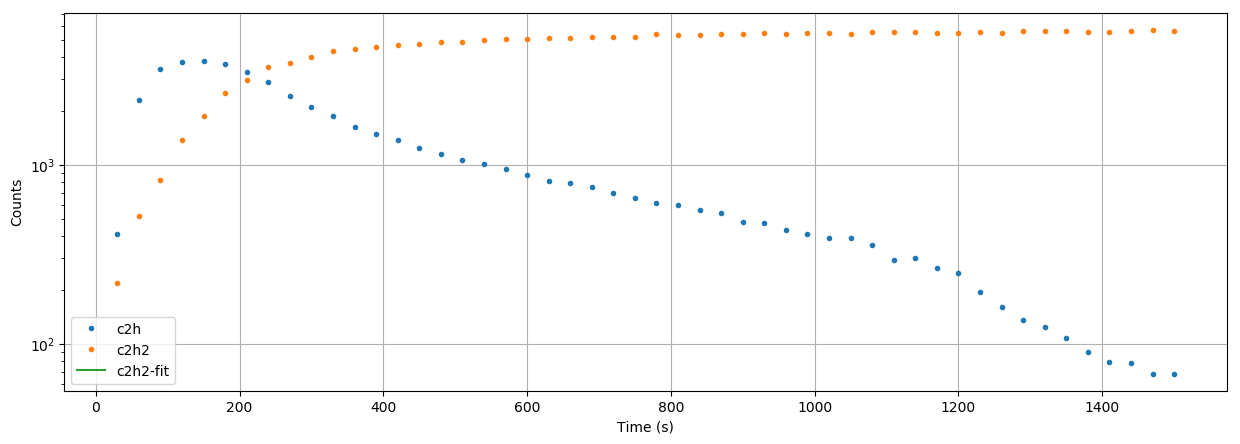

In [102]:
def rxn(y, t):
    
    h2 = 3.3e-9
    kf = 0.4e-10
    rf = -kf * y[0] * h2
    #rb = kb * y[1] * h2
    
    #dc2h_dt = -rf + rb
    dc2h2_dt = -rf
    
    return [dc2h2_dt]

fig, ax = plt.subplots(figsize = (15, 5), dpi = 100)

t = time[1:]
c2h = m['24.8'][1:]
c2h2 = m['25.8'][1:]

y0 = [0]

yout = odeint(rxn, y0, t)

ax.plot(t, c2h, '.', label = 'c2h')
ax.plot(t, c2h2, '.', label = 'c2h2')

ax.plot(t, yout[:, 0], '-', label = 'c2h2-fit')
#ax.plot(t, yout[:, 1], '-', label = 'c2h2-fit')

ax.set_yscale('log')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Counts')
ax.legend()
ax.grid()

plt.show()
plt.close()